In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

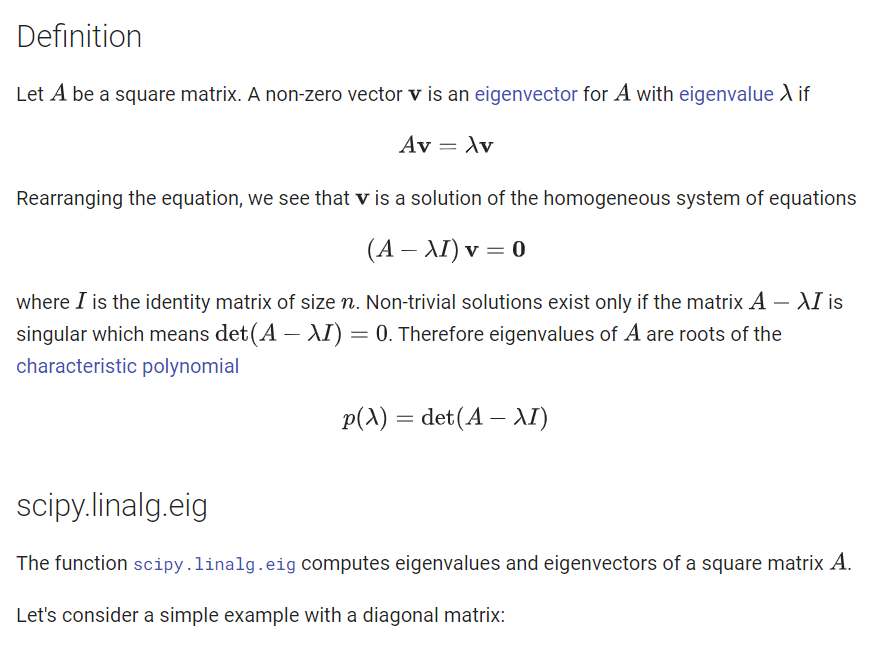

In [ ]:
A = np.array([[1,0],[0,-2]])
print(A)

[[ 1  0]
 [ 0 -2]]


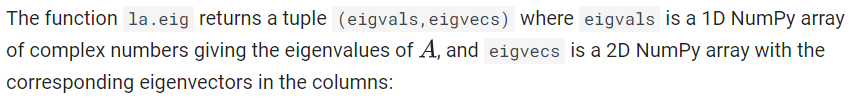

In [ ]:
results = la.eig(A)

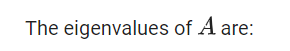

In [ ]:
print(results[0])

[ 1.+0.j -2.+0.j]


The corresponding eigenvectors are:


In [ ]:
print(results[1])

[[1. 0.]
 [0. 1.]]


We can unpack the tuple:

In [ ]:
eigvals, eigvecs = la.eig(A)
print(eigvals)

[ 1.+0.j -2.+0.j]


In [ ]:
print(eigvecs)

[[1. 0.]
 [0. 1.]]


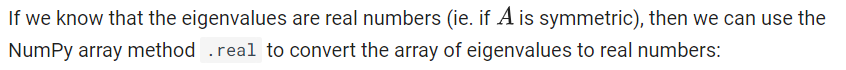

In [ ]:
eigvals = eigvals.real
print(eigvals)

[ 1. -2.]


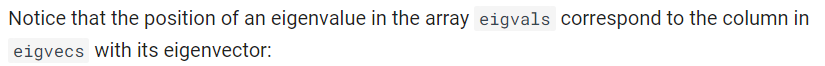

In [ ]:
lambda1 = eigvals[1]
print(lambda1)

-2.0


In [ ]:
v1 = eigvecs[:,1].reshape(2,1)
print(v1)

[[0.]
 [1.]]


In [ ]:
A @ v1

array([[ 0.],
       [-2.]])

In [ ]:
lambda1 * v1

array([[-0.],
       [-2.]])

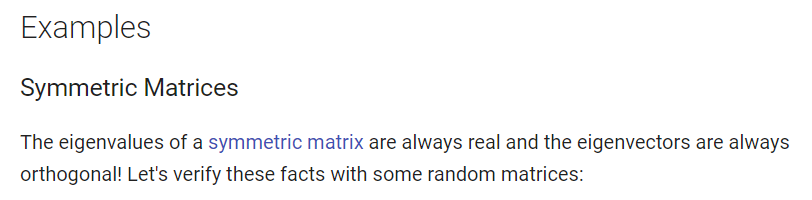

In [ ]:
n = 4
P = np.random.randint(0,10,(n,n))
print(P)

[[7 3 3 0]
 [2 1 0 9]
 [1 8 4 1]
 [5 9 5 8]]


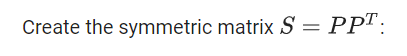

In [ ]:
S = P @ P.T
print(S)

[[ 67  17  43  77]
 [ 17  86  19  91]
 [ 43  19  82 105]
 [ 77  91 105 195]]


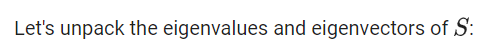

In [ ]:
evals, evecs = la.eig(S)
print(evals)

[3.25228059e+02+0.j 7.29104688e+01+0.j 3.18240706e+01+0.j
 3.74011483e-02+0.j]


The eigenvalues all have zero imaginary part and so they are indeed real numbers:

In [ ]:
evals = evals.real
print(evals)

[3.25228059e+02 7.29104688e+01 3.18240706e+01 3.74011483e-02]


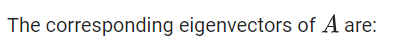

In [ ]:
print(evecs)

[[ 0.32326854  0.38839016 -0.83168179 -0.23012155]
 [ 0.35030555 -0.79233782 -0.09835655 -0.48970685]
 [ 0.41829347  0.4671239   0.53690146 -0.56441355]
 [ 0.77318435 -0.0561171   0.1018244   0.62343293]]


Let's check that the eigenvectors are orthogonal to each other:

In [ ]:
v1 = evecs[:,0] # First column is the first eigenvector
print(v1)

[0.32326854 0.35030555 0.41829347 0.77318435]


In [ ]:
v2 = evecs[:,1] # Second column is the second eigenvector
print(v2)

[ 0.38839016 -0.79233782  0.4671239  -0.0561171 ]


In [ ]:
v1 @ v2

2.7755575615628914e-17

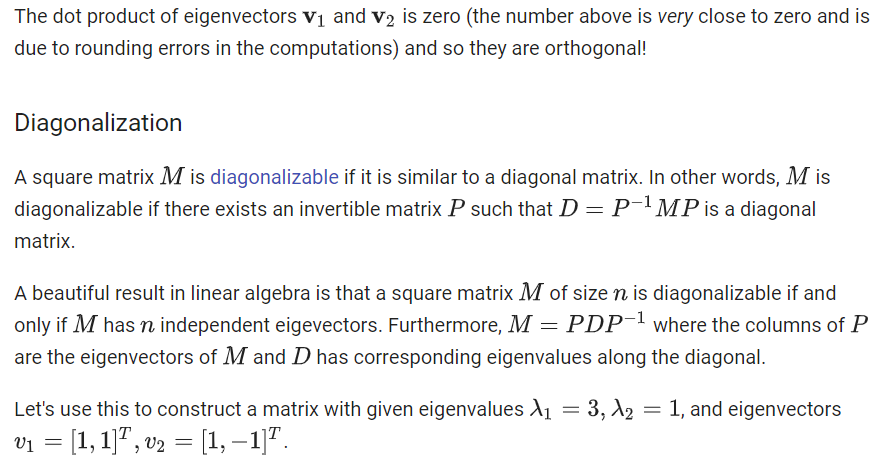

In [ ]:
P = np.array([[1,1],[1,-1]])
print(P)

[[ 1  1]
 [ 1 -1]]


In [ ]:
D = np.diag((3,1))
print(D)

[[3 0]
 [0 1]]


In [ ]:
M = P @ D @ la.inv(P)
print(M)

[[2. 1.]
 [1. 2.]]


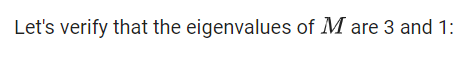

In [ ]:
evals, evecs = la.eig(M)
print(evals)

[3.+0.j 1.+0.j]


Verify the eigenvectors:

In [ ]:
print(evecs)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


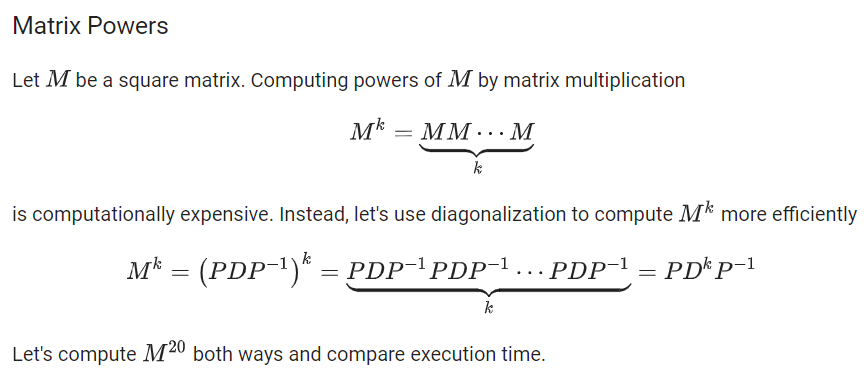

In [ ]:
Pinv = la.inv(P)

In [ ]:
k = 20

In [ ]:
%%timeit
result = M.copy()
for _ in range(1,k):
    result = result @ M

The slowest run took 14.37 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 27.5 µs per loop


Let's use diagonalization to do the same computation.

In [ ]:
%%timeit
P @ D**k @ Pinv

The slowest run took 16.70 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.51 µs per loop


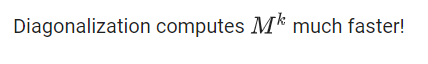